In [ ]:
# !pip install ydata_profiling

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [ ]:
# Using dataset given to you in previous self practice task.
# Loading Data from a JSON File
with open('/content/drive/MyDrive/Colab Notebooks/ML/Lab 4/order_cancellation_data.json', 'r') as file:
    data = pd.read_json(file)

In [ ]:
report = ProfileReport(data)
# report.to_file('data_profile_report.html')

In [ ]:
# Replacing the categorical feature in the 'order_status' column.
data['order_status'] = data['order_status'].replace({'F':1, 'C':0})

In [ ]:
# Sorting the data by date and dropping this column.
data.sort_values(by='order_create_time', inplace=True)
data.drop('order_create_time', axis=1, inplace=True)

In [ ]:
# Dropping rows with zero values in the "total_order_items" column.
data = data[data['total_order_items'] > 0]
# Removing outliers (dropping all values greater than the 95th percentile).
data = data[data['total_order_items'] <= 8]

In [ ]:
  # I'm filling the missing (NaN) values in the "cost(USD)" column with the mean values.
  data['cost(USD)'].fillna(data['cost(USD)'].mean(), inplace=True)
  # I'm dropping rows with values less than 8 in the "cost(USD)" column.
  data = data[data['cost(USD)'] >= 8]
  # I'm removing outliers by dropping all values that are greater than the 95th percentile in the "cost(USD)" column.
  data = data[data['cost(USD)'] <= 21.32]

In [ ]:
# I'm dropping rows with zero values in the "payment_type" column.
data['payment_type'].dropna(inplace=True)

# We will convert categorical features into numerical ones using one-hot encoding.
data = pd.get_dummies(data, columns=['payment_type'])

In [ ]:
# Filling in missing (NaN) values in the "vendor_client_distance" column with the mean values.
data['vendor_client_distance'].fillna(data['vendor_client_distance'].mean(), inplace=True)
# Removing outliers by dropping all values greater than the 95th percentile in the "vendor_client_distance" column.
data = data[data['vendor_client_distance'] <= 9818]

In [ ]:
# Filling missing (NaN) values in the "estimated_delivery_time" column with the mean values.
data['estimated_delivery_time'].fillna(data['estimated_delivery_time'].mean(), inplace=True)
# Removing outliers by dropping all rows with values greater than the 95th percentile in the "estimated_delivery_time" column.
data = data[data['estimated_delivery_time'] <= 102]

In [ ]:
# Filling missing (NaN) values in the "predicted_order_preparation_time" column with the mean values.
data['predicted_order_preparation_time'].fillna(data['predicted_order_preparation_time'].mean(), inplace=True)
# Removing outliers by dropping all rows with values greater than the 95th percentile in the "predicted_order_preparation_time" column.
data = data[data['predicted_order_preparation_time'] <= 31]

<ipython-input-141-aeedf63fa6d2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_order_preparation_time'].fillna(data['predicted_order_preparation_time'].mean(), inplace=True)


In [ ]:
data.drop('vendor_id', axis=1, inplace=True)

In [ ]:
# We split the data into features and the target variable.
X = data.drop('order_status', axis=1)
y = data[['order_status']]

In [ ]:
# Divide the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=False)

In [ ]:
# Data balancing
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Scaling the data
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

## <center>Self-Practice  Task</center>

* Using dataset given to you in previous self practice task.
    1. Train a logistic regression model with Regularization
    1. Train a logistic regression model with data after PCA
    1. Calculate Accuracy, Precision and Recall values for each of the above trained models



# 1. Train a logistic regression model with Regularization

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Определите диапазон значений C
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Создайте экземпляр LogisticRegression
logistic_regression = LogisticRegression()

# Создайте экземпляр GridSearchCV
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='precision')

# Запустите поиск
grid_search.fit(X_train_resampled, y_train_resampled)

# Получите оптимальное значение C
best_C = grid_search.best_params_['C']

# Получите лучшую модель
best_model = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
best_C

10

In [ ]:
y_pred_logistic = best_model.predict(X_test)

# Model estimation
accuracy = metrics.accuracy_score(y_test, y_pred_logistic)
conf_matrix = metrics.confusion_matrix(y_test, y_pred_logistic)
class_report = metrics.classification_report(y_test, y_pred_logistic)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.60
Confusion Matrix:
 [[1111   62]
 [3135 3744]]
Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.95      0.41      1173
           1       0.98      0.54      0.70      6879

    accuracy                           0.60      8052
   macro avg       0.62      0.75      0.56      8052
weighted avg       0.88      0.60      0.66      8052



In [ ]:
# Create a logistic regression model with L1 regularized balanced data and with C parametr
model = LogisticRegression(C=100, penalty='l1', solver='liblinear')
model.fit(X_train_resampled, y_train_resampled)

# Predicting values
y_pred_logistic = model.predict(X_test)

# Model estimation
accuracy = metrics.accuracy_score(y_test, y_pred_logistic)
conf_matrix = metrics.confusion_matrix(y_test, y_pred_logistic)
class_report = metrics.classification_report(y_test, y_pred_logistic)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.60
Confusion Matrix:
 [[1111   62]
 [3135 3744]]
Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.95      0.41      1173
           1       0.98      0.54      0.70      6879

    accuracy                           0.60      8052
   macro avg       0.62      0.75      0.56      8052
weighted avg       0.88      0.60      0.66      8052



In [ ]:
# Create a logistic regression model with regularized L2 balanced data and with C parametr
model = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')
model.fit(X_train_resampled, y_train_resampled)

# Predicting values
y_pred_logistic = model.predict(X_test)

# Model estimation
accuracy = metrics.accuracy_score(y_test, y_pred_logistic)
conf_matrix = metrics.confusion_matrix(y_test, y_pred_logistic)
class_report = metrics.classification_report(y_test, y_pred_logistic)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.60
Confusion Matrix:
 [[1111   62]
 [3135 3744]]
Classification Report:
               precision    recall  f1-score   support

           0       0.26      0.95      0.41      1173
           1       0.98      0.54      0.70      6879

    accuracy                           0.60      8052
   macro avg       0.62      0.75      0.56      8052
weighted avg       0.88      0.60      0.66      8052



# 2. Train a logistic regression model with data after PCA

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
pca = PCA()
pca.fit(X_train_resampled)
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
# Выберите число компонент, которые объясняют, скажем, 95% дисперсии
n_components = np.argmax(cumulative_variance >= 0.95) + 1

In [ ]:
n_components

6

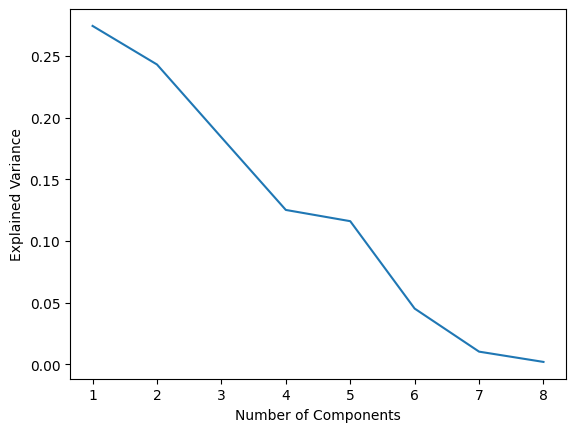

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(X_train_resampled)
explained_variance = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()


In [ ]:
# Примените PCA для уменьшения размерности
pca = PCA(n_components=6)  # Выберите количество компонент, которые вы хотите использовать
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)

# Создайте экземпляр логистической регрессии
model = LogisticRegression()

# Обучите модель на обучающих данных
model.fit(X_train_pca, y_train_resampled)

# Predicting values
y_pred_pca = model.predict(X_test_pca)

# Model estimation
accuracy = metrics.accuracy_score(y_test, y_pred_pca)
conf_matrix = metrics.confusion_matrix(y_test, y_pred_pca)
class_report = metrics.classification_report(y_test, y_pred_pca)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.59
Confusion Matrix:
 [[ 940  233]
 [3069 3810]]
Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.80      0.36      1173
           1       0.94      0.55      0.70      6879

    accuracy                           0.59      8052
   macro avg       0.59      0.68      0.53      8052
weighted avg       0.84      0.59      0.65      8052



# 3. Calculate Accuracy, Precision and Recall values for each of the above trained models

## 3.1. For logistic regression


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


# Вычислите Accuracy
accuracy = accuracy_score(y_test, y_pred_logistic)
print(f'Accuracy: {accuracy:.2f}')

# Вычислите Precision
precision = precision_score(y_test, y_pred_logistic)
print(f'Precision: {precision:.2f}')

# Вычислите Recall
recall = recall_score(y_test, y_pred_logistic)
print(f'Recall: {recall:.2f}')


Accuracy: 0.60
Precision: 0.98
Recall: 0.54


## 3.2. For PCA

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Вычислите Accuracy
accuracy = accuracy_score(y_test, y_pred_pca)
print(f'Accuracy: {accuracy:.2f}')

# Вычислите Precision
precision = precision_score(y_test, y_pred_pca)
print(f'Precision: {precision:.2f}')

# Вычислите Recall
recall = recall_score(y_test, y_pred_pca)
print(f'Recall: {recall:.2f}')


Accuracy: 0.59
Precision: 0.94
Recall: 0.55


The results of regression and regression after applying PCA should be analyzed with the following aspects in mind:

1. **Accuracy:**
   - Regression: The accuracy is 0.60, which means the model correctly classified 60% of the test observations.
   - Regression after PCA: The accuracy is 0.59, indicating that the model correctly classified 59% of the test observations after applying PCA.
   - Comparison: Accuracy in regression and regression after PCA is approximately the same, with a slight advantage for regression.

2. **Precision:**
   - Regression: The precision is 0.98, indicating that the model accurately identifies positive cases.
   - Regression after PCA: The precision is 0.94, which is also a high precision value.
   - Comparison: Both models have high precision, but regression has a slight advantage in this aspect.

3. **Recall:**
   - Regression: The recall is 0.54, meaning the model correctly identified 54% of positive cases.
   - Regression after PCA: The recall is 0.55, indicating a good ability of the model to find positive cases.
   - Comparison: Both models have similar recall values.

Overall Conclusion:
- Both models show good results with high precision, meaning they correctly classify most positive predictions.
- Recall is also quite good in both models, and they detect most positive cases.
- Regression after PCA has slightly lower accuracy and Accuracy, but the difference is small.

The choice between regression and regression after PCA may depend on your task and priorities. If you have constraints on computational resources or data dimensionality, PCA can be useful for reducing data dimensionality while maintaining acceptable model quality.